<a href="https://colab.research.google.com/github/Harshik97/Clustering_COVID19_data/blob/master/ML_7_COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

**Importing and plotting data**

(a)

In [ ]:
case_data=pd.read_csv('/content/us_states.csv')
location_data=pd.read_csv('/content/statelatlong.csv')


In [ ]:
main_data=case_data.merge(location_data,how='left')

In [ ]:
main_data.head()

,date,City,fips,cases,deaths,State,Latitude,Longitude
0,2020-01-24,Illinois,17,1,0,IL,39.739318,-89.504139
1,2020-01-25,California,6,1,0,CA,37.271875,-119.270415
2,2020-01-25,Illinois,17,1,0,IL,39.739318,-89.504139
3,2020-01-26,Arizona,4,1,0,AZ,34.168219,-111.930907
4,2020-01-26,California,6,2,0,CA,37.271875,-119.270415


(b)

In [ ]:
sampled_data=main_data.loc[main_data['date']=='2020-03-25']

In [ ]:
sampled_data.head()

,date,City,fips,cases,deaths,State,Latitude,Longitude
1163,2020-03-25,Alabama,1,386,1,AL,32.601011,-86.680736
1164,2020-03-25,Alaska,2,59,0,AK,61.302501,-158.775020
1165,2020-03-25,Arizona,4,402,6,AZ,34.168219,-111.930907
1166,2020-03-25,Arkansas,5,308,2,AR,34.751928,-92.131378
1167,2020-03-25,California,6,3183,67,CA,37.271875,-119.270415


(c)

In [ ]:
case_list=sampled_data['cases'].tolist()
case_sampled_data=sampled_data[['cases','Latitude','Longitude','City']]



In [ ]:
size=[i*(1/20) for i in case_list]


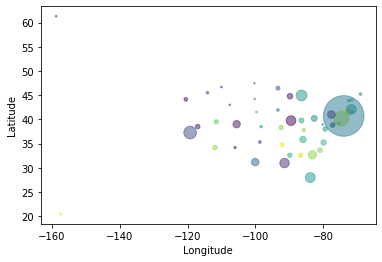

In [ ]:
colors=np.random.rand(53)
plt.scatter(case_sampled_data['Longitude'],case_sampled_data['Latitude'],s=size,c=colors,alpha=0.5)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

In [ ]:
X=case_sampled_data[['Longitude','Latitude','City']]

X=X.dropna()


**3.2 Geographical Distribution of Cases**

(a) Unweighted K-means clustering by location. 

Text(0.5, 0, 'Value of K')

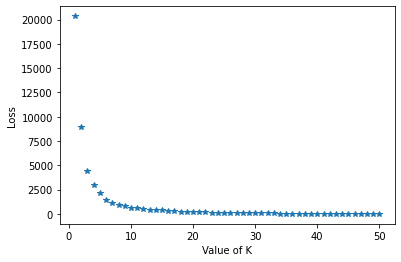

In [ ]:



loss1=[]

for K in range(1,51):
 
  X1=X[['Longitude','Latitude']]
 
  kmeans=KMeans(n_clusters=K).fit(X1)
  kmeans.predict(X1)
  loss1.append(kmeans.inertia_)

x=[x for x in range(1,51)]
plt.plot(x,loss1,'*')
plt.ylabel('Loss')
plt.xlabel('Value of K')



(b) Unweighted K-means clustering by location. 

In [ ]:

X1=X[['Longitude','Latitude']]

kmeans1=KMeans(n_clusters=15).fit(X1)
kmeans1.predict(X1)
cluster_centre1=kmeans1.cluster_centers_
labels1=kmeans1.labels_


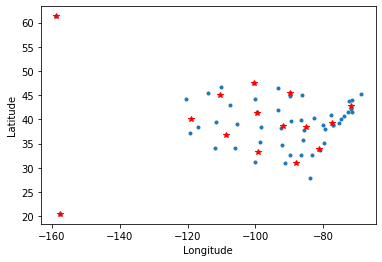

In [ ]:
X['labels']=labels1

longitude=X['Longitude'].tolist()
latitude=X['Latitude'].tolist()
plt.plot(longitude,latitude,'.')
for i in range(0,15):
  
  plt.plot(cluster_centre1[i,0],cluster_centre1[i,1],'r*')

plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()



In [ ]:
for i in range(0,15):

  row=X.loc[X['labels']==i]
  
  #print('Cities in Cluster ',i,'--')
  #print('\n ',row['City'])
  

(c) Weighted K-Means by location

Text(0.5, 0, 'Value of K')

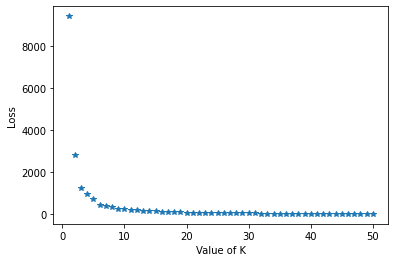

In [ ]:

X=case_sampled_data[['Longitude','Latitude','City','cases']]

X=X.dropna()

loss1=[]
for K in range(1,51):
  X1=X[['Latitude','Longitude']]
  kmeans=KMeans(n_clusters=K).fit(X1,sample_weight=X['cases'])
  kmeans.predict(X1,sample_weight=X['cases'])
  loss1.append(kmeans.inertia_)

x=[x for x in range(1,51)]
plt.plot(x,loss1,'*')
plt.ylabel('Loss')
plt.xlabel('Value of K')




(d) Weighted K-Means by location

In [ ]:
X1=X[['Latitude','Longitude']]
kmeans1=KMeans(n_clusters=15).fit(X1,sample_weight=X['cases'])
kmeans1.predict(X1,sample_weight=X['cases'])
cluster_centre1=kmeans1.cluster_centers_
labels1=kmeans1.labels_

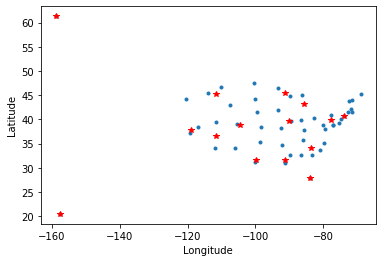

In [ ]:
X['labels']=labels1
longitude=X['Longitude'].tolist()
latitude=X['Latitude'].tolist()
plt.plot(longitude,latitude,'.')
for i in range(0,15):
  
  plt.plot(cluster_centre1[i,1],cluster_centre1[i,0],'r*')

plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

In [ ]:
for i in range(0,15):

  row=X.loc[X['labels']==i]
  
  #print('Cities in Cluster ',i,'--')
  #print('\n ',row['City'])
  

**3.3 Growth Rate Modeling and Distribution Analysis**

(a) Plot of Cases Vs Date for New York and California

In [ ]:
date_new=pd.Series(range(0,1862))

In [ ]:
case_data['date_replace']=date_new

In [ ]:
case_data.rename(columns={"date_replace":"Date"})
case_data.drop(columns=['date'],axis=1)

,City,fips,cases,deaths,date_replace
0,Illinois,17,1,0,0
1,California,6,1,0,1
2,Illinois,17,1,0,2
3,Arizona,4,1,0,3
4,California,6,2,0,4
...,...,...,...,...,...
1857,Virgin Islands,78,43,1,1857
1858,Virginia,51,2878,54,1858
1859,West Virginia,54,345,4,1859
1860,Wisconsin,55,2440,83,1860


In [ ]:
ca=case_data.loc[case_data['City']=='California']
ny=case_data.loc[case_data['City']=='New York']
ny_cases=ny['cases'].to_numpy()
ny_dates=ny['date_replace'].to_numpy()
ca_cases=ca['cases'].to_numpy()
ca_dates=ca['date_replace'].to_numpy()


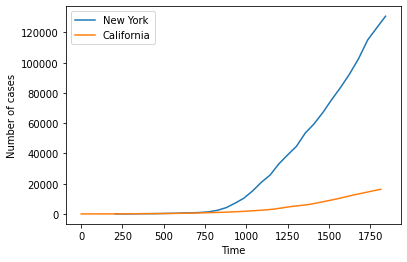

In [ ]:
plt.plot(ny_dates,ny_cases,label='New York')
plt.plot(ca_dates,ca_cases,label='California')
plt.legend(loc='best')
plt.ylabel('Number of cases')
plt.xlabel('Time')
plt.show()

(b) Exponential modeling.

In [ ]:
y=np.polyfit(ny_dates,np.log(ny_cases),1)

In [ ]:
A_NY=np.exp(y[1])
B_NY=y[0]
A_NY,B_NY

(5.751959231278503, 0.006430956741236124)

In [ ]:
Z=np.polyfit(ca_dates,np.log(ca_cases),1)
Z

array([0.00512605, 1.85507483])

In [ ]:
A_ca=np.exp(Z[1])
B_ca=Z[0]

In [ ]:
A_ca,B_ca

(6.392176577500427, 0.0051260460412906874)

(c) Exponential modeling.

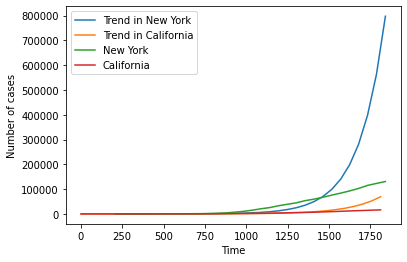

In [ ]:
plt.plot(ny_dates,A_NY*(np.exp(B_NY*ny_dates)),label='Trend in New York')
plt.plot(ca_dates,A_ca*(np.exp(B_ca*ca_dates)),label='Trend in California')
plt.plot(ny_dates,ny_cases,label='New York')
plt.plot(ca_dates,ca_cases,label='California')
plt.legend(loc='best')
plt.ylabel('Number of cases')
plt.xlabel('Time')
plt.show()


(d)K-means clustering by growth rate.

In [ ]:
A=[]
B=[]
cities=[]
for city in case_data['City'].unique():
    cities.append(city)
    city=case_data.loc[case_data['City']==city]
    cases=city['cases'].to_numpy()
    date=city['date_replace'].to_numpy()
    z=np.polyfit(date,np.log(cases),1)
    a=np.exp(z[1])
    b=z[0]
    A.append(a)
    B.append(b)


In [ ]:
parameters=np.append(A,B)
param1=parameters[:54].reshape(54,1)
param2=parameters[54:].reshape(54,1)
data={'City':cities,'A':A,'B':B}
df=pd.DataFrame(data)
X=df[['A','B']]
loss3=[]
for K in range(1,51):
  
  kmeans=KMeans(n_clusters=K).fit(X)
  kmeans.predict(X)
  loss3.append(kmeans.inertia_)

In [ ]:
df


,City,A,B,Labels
0,Illinois,1.286607,0.005746,0
1,California,6.392177,0.005126,1
2,Arizona,0.688975,0.004985,5
3,Massachusetts,0.815978,0.006168,5
4,Wisconsin,0.528785,0.005246,2
5,Texas,2.673775,0.004775,4
6,Nebraska,7.967280,0.002099,3
7,Utah,0.530835,0.004940,2
8,Oregon,1.495663,0.004090,0
9,Florida,1.992155,0.005496,7


Text(0.5, 0, 'Value of K')

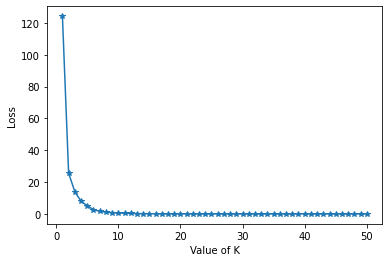

In [ ]:
x=[x for x in range(1,51)]
plt.plot(x,loss3,'*-')
plt.ylabel('Loss')
plt.xlabel('Value of K')

(d) K-means clustering by growth rate.

In [ ]:
kmeans1=KMeans(n_clusters=8).fit(X)
labels=kmeans1.predict(X)

In [ ]:
df['Labels']=labels

In [ ]:
for i in range(0,8):

  row=df.loc[df['Labels']==i]
  
  print('Cities in Cluster ',i,'--')
  print('\n ',row['City'])
  

Cities in Cluster  0 --

  0           Illinois
8             Oregon
17          Maryland
25      Pennsylvania
26    South Carolina
31          Virginia
37      South Dakota
38          Arkansas
41        New Mexico
Name: City, dtype: object
Cities in Cluster  1 --

  1     California
10      New York
Name: City, dtype: object
Cities in Cluster  2 --

  4                    Wisconsin
7                         Utah
20                      Hawaii
21                     Indiana
24                    Oklahoma
28                      Kansas
29                    Missouri
30                     Vermont
32                 Connecticut
39                    Delaware
40                 Mississippi
42                North Dakota
43                     Wyoming
44                      Alaska
47                       Idaho
49                 Puerto Rico
50              Virgin Islands
51                        Guam
52               West Virginia
53    Northern Mariana Islands
Name: City, dtype: objec

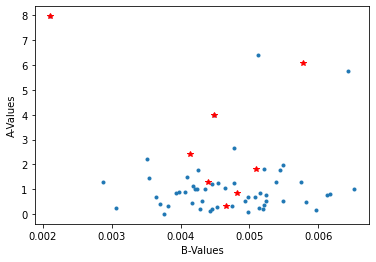

In [ ]:
plt.plot(B,A,'.')
centre=kmeans1.cluster_centers_
for i in range(0,8):
  
  plt.plot(centre[i,1],centre[i,0],'r*')

plt.ylabel('A-Values')
plt.xlabel('B-Values')
plt.show()